In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def resumen(datos):
    return print('Forma:\n', datos.shape,'\n\n',
                 'Columnas:\n', datos.columns,'\n\n',
                 'Tipos:\n', datos.dtypes,'\n\n',
                 'Datos nulos:\n', datos.isnull().sum(),'\n\n',
                 'Cabecera:\n', datos.head(10),'\n\n',
                 'Últimos datos:\n', datos.tail(10),'\n\n',
                 'Estadísticos:\n', datos.describe([0.05,0.25,0.5,0.75,0.95])
                )
def metadata(ejex, ejey):
    # plt.title(titulo, fontsize = 60, fontweight='bold')
    plt.xlabel(ejex, fontsize = 35)
    plt.ylabel(ejey, fontsize = 35)
    plt.xticks(fontsize = 25)
    plt.yticks(fontsize = 25)
    return

In [3]:
biomasa = pd.read_csv(
        #'C:\\Users\\BIOMET\\Desktop\\Tesis_2\\Datos\\Biomasa.txt',
        'C:\\Users\\nahue\\Desktop\\Tesis_2\\Datos\\Biomasa.txt',
        delimiter = '\t',
        decimal = '.',
        )

In [4]:
resumen(biomasa)

Forma:
 (7, 10) 

 Columnas:
 Index(['Fecha', 'Sitio 1 S', 'Sitio 2 S', 'Sitio 3 S', 'Sitio 1 V',
       'Sitio 2 V', 'Sitio 3 V', 'Sitio 1 T', 'Sitio 2 T', 'Sitio 3 T'],
      dtype='object') 

 Tipos:
 Fecha         object
Sitio 1 S    float64
Sitio 2 S    float64
Sitio 3 S    float64
Sitio 1 V    float64
Sitio 2 V    float64
Sitio 3 V    float64
Sitio 1 T    float64
Sitio 2 T    float64
Sitio 3 T    float64
dtype: object 

 Datos nulos:
 Fecha        0
Sitio 1 S    0
Sitio 2 S    0
Sitio 3 S    0
Sitio 1 V    0
Sitio 2 V    0
Sitio 3 V    0
Sitio 1 T    0
Sitio 2 T    0
Sitio 3 T    0
dtype: int64 

 Cabecera:
     Fecha    Sitio 1 S    Sitio 2 S    Sitio 3 S    Sitio 1 V    Sitio 2 V  \
0  23-feb  1665.922500  2741.985000  1425.181250  1303.700625   995.790000   
1  04-abr  3441.581250  2701.359375  1852.176563  1206.965625  2071.865625   
2  18-may  2474.334375  2190.343750  2109.193750  2002.631250  2016.671875   
3  28-jun  2680.234375  3841.062500  3078.968750  1165.937500  119

In [5]:
relleno_RED = pd.read_csv(
        #'C:\\Users\\BIOMET\\Desktop\\Tesis_2\\Datos\\output.txt',
        'C:\\Users\\nahue\\Desktop\\Tesis_2\\Datos\\output.txt',
        delimiter = '\t',
        decimal = '.',
        skiprows = [1]
        )

In [6]:
resumen(relleno_RED)

Forma:
 (14956, 119) 

 Columnas:
 Index(['Year', 'DoY', 'Hour', 'NEE', 'LE', 'H', 'Rg', 'Tair', 'Tsoil', 'rH',
       ...
       'FP_E0', 'FP_k_sd', 'FP_beta_sd', 'FP_alpha_sd', 'FP_RRef_sd',
       'FP_E0_sd', 'Reco_DT', 'GPP_DT', 'Reco_DT_SD', 'GPP_DT_SD'],
      dtype='object', length=119) 

 Tipos:
 Year            int64
DoY             int64
Hour          float64
NEE           float64
LE            float64
               ...   
FP_E0_sd      float64
Reco_DT       float64
GPP_DT        float64
Reco_DT_SD    float64
GPP_DT_SD     float64
Length: 119, dtype: object 

 Datos nulos:
 Year          0
DoY           0
Hour          0
NEE           0
LE            0
             ..
FP_E0_sd      0
Reco_DT       0
GPP_DT        0
Reco_DT_SD    0
GPP_DT_SD     0
Length: 119, dtype: int64 

 Cabecera:
    Year  DoY  Hour     NEE      LE       H       Rg    Tair    Tsoil      rH  \
0  2018   54   9.0 -9999.0 -9999.0 -9999.0   525.40  19.180  18.1400  59.930   
1  2018   54   9.5 -9999.0 -9999

In [7]:
dias = [54, 94, 138, 179, 235, 284, 346]
nee_RED = list(range(1, len(dias)))
gpp_RED = list(range(1, len(dias)))
biomasa['Cantidad'] = biomasa['Sitio 1 S'][:]
for i in list(range(1, len(dias))):
    desde = dias[i-1]
    hasta = dias[i]
    cantidad = hasta - desde
    red_bimens = relleno_RED[(relleno_RED['DoY'] >= desde)
                           & (relleno_RED['DoY'] < hasta)
                          ]
    biomasa['Cantidad'][i] = cantidad
    gpp_RED[i-1] = red_bimens['GPP_f'].sum()*60*30/1000000*44/cantidad
    nee_RED[i-1] = red_bimens['NEE_f'].sum()*60*30/1000000*44/cantidad

C:\Users\nahue\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


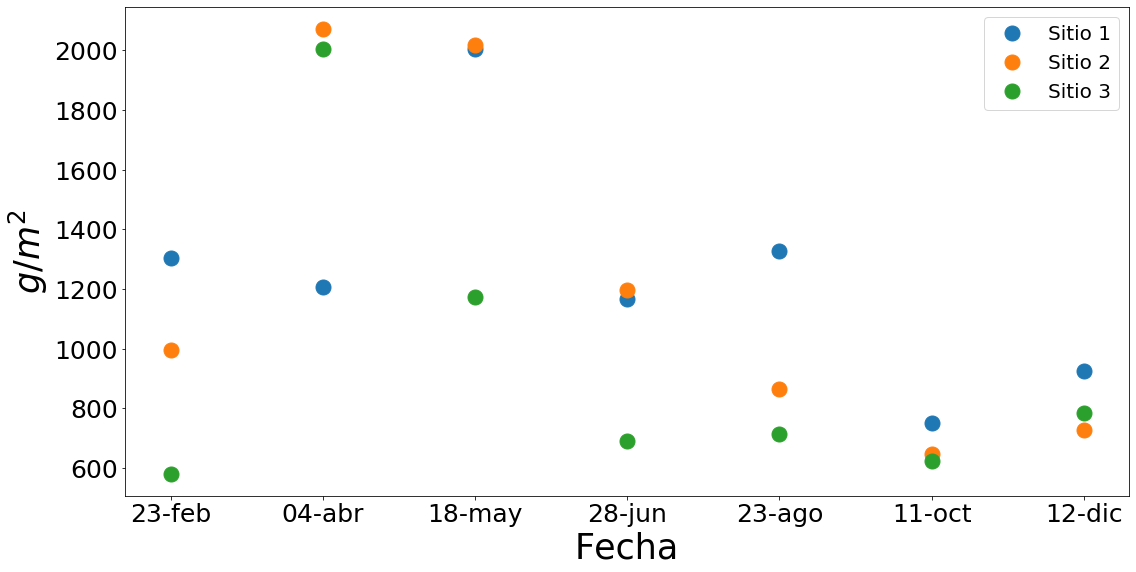

In [13]:
plt.figure(figsize=(18,9))
plt.plot(biomasa['Fecha'], biomasa['Sitio 1 V'], 'o', ms = 15)
plt.plot(biomasa['Fecha'], biomasa['Sitio 2 V'], 'o', ms = 15)
plt.plot(biomasa['Fecha'], biomasa['Sitio 3 V'], 'o', ms = 15)
metadata('Fecha', '$g/m^2$')
plt.legend(['Sitio 1', 'Sitio 2', 'Sitio 3'],
           fontsize = 20
          )
plt.savefig('C:\\Users\\nahue\\Desktop\\Tesis_2\\Escritura\\Biomasa.png')

In [14]:
prom = (biomasa['Sitio 2 V'] + biomasa['Sitio 3 V']) /2
prom_2 = list(range(len(prom)))
for i in list(range(len(prom))):
    prom_2[i] = prom[i]/biomasa['Cantidad'][i]

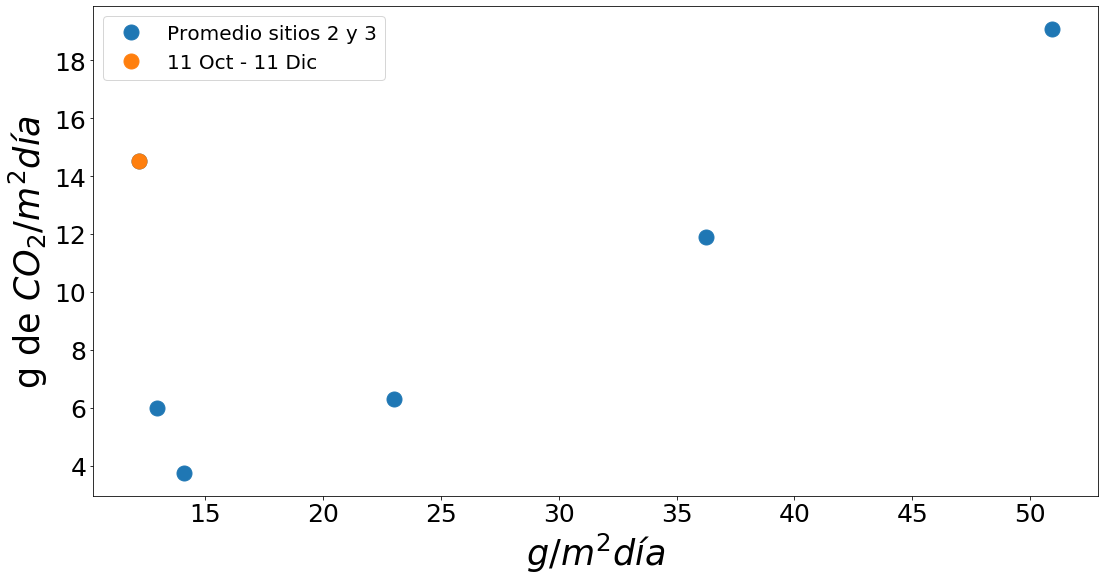

In [16]:
plt.figure(figsize=(18,9))
plt.plot(prom_2[1:], gpp_RED[:], 'o', ms = 15)
plt.plot(prom_2[-1], gpp_RED[-1], 'o', ms = 15)
metadata('$g/m^2 día$', 'g de $CO_{2}/m^2 día$')
plt.legend(['Promedio sitios 2 y 3',
            '11 Oct - 11 Dic'],
           fontsize = 20
          )
plt.savefig('C:\\Users\\nahue\\Desktop\\Tesis_2\\Escritura\\GPP vs Bio.png')